In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

In [5]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Imagenes de prueba sin normalizar
x_test_original = x_test
y_test_original = y_test

# Normalizar las imágenes y convertir las etiquetas a one-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Crear un modelo sin modelo preentrenado
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
391/391 [==============================] - 22s 54ms/step - loss: 1.6684 - accuracy: 0.3882 - val_loss: 1.4075 - val_accuracy: 0.4885
Epoch 2/10
391/391 [==============================] - 21s 55ms/step - loss: 1.3043 - accuracy: 0.5293 - val_loss: 1.2014 - val_accuracy: 0.5619
Epoch 3/10
391/391 [==============================] - 21s 55ms/step - loss: 1.1507 - accuracy: 0.5927 - val_loss: 1.0862 - val_accuracy: 0.6170
Epoch 4/10
391/391 [==============================] - 21s 55ms/step - loss: 1.0492 - accuracy: 0.6306 - val_loss: 1.0147 - val_accuracy: 0.6452
Epoch 5/10
391/391 [==============================] - 21s 54ms/step - loss: 0.9756 - accuracy: 0.6579 - val_loss: 0.9941 - val_accuracy: 0.6566
Epoch 6/10
391/391 [==============================] - 21s 53ms/step - loss: 0.9215 - accuracy: 0.6758 - val_loss: 0.9935 - val_accuracy: 0.6594
Epoch 7/10
391/391 [==============================] - 22s 55ms/step - loss: 0.8759 - accuracy: 0.6966 - val_loss: 0.9510 - val_accuracy:

313/313 [==============================] - 6s 18ms/step


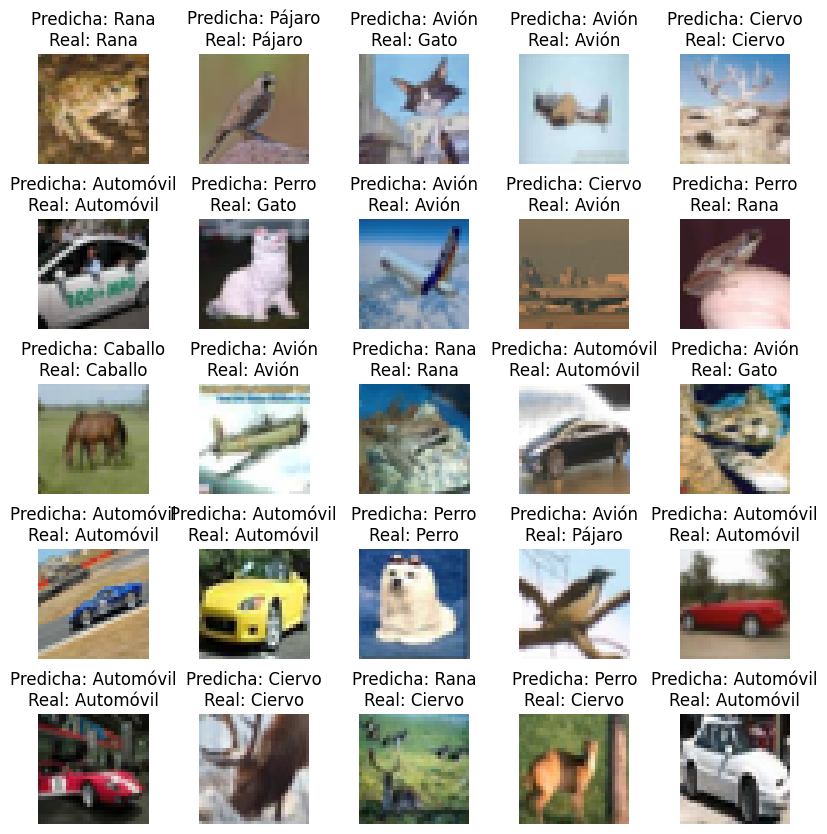

In [4]:
# Obtener predicciones en el conjunto de prueba
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Seleccionar 25 índices aleatorios para mostrar las imágenes
random_indices = np.random.choice(range(len(x_test)), size=25, replace=False)

# Configurar la matriz de imágenes de 5x5
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

# Mostrar las imágenes y las etiquetas predichas y reales
for i, idx in enumerate(random_indices):
    ax = axes[i // 5, i % 5]
    ax.imshow(x_test_original[idx], cmap=plt.cm.binary)
    ax.axis('off')
    predicted_label = predicted_labels[idx]
    true_label = true_labels[idx]
    ax.set_title(f'Predicha: {class_names[predicted_label]}\nReal: {class_names[true_label]}')

plt.show()